In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
#pip install vaderSentiment
#pip install wordcloud
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [3]:
review = pd.read_csv("bumble_google_play_reviews.csv")
review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOHzFnRT8OteZT0bORvHDjfo2rRVbMlDxC9Ncmn...,Andrew Bogwald,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's funny, I didn't really get any matches un...",1,0,5.263.1,2022-04-04 23:25:28,"Hi Andrew, our team would love the opportunity...",2021-07-26 08:55:24
1,gp:AOqpTOGUCzQdBXuib31Wuh_eA9_HVrvkDl_kp8GkDkD...,kapil shrimali,https://play-lh.googleusercontent.com/a-/AOh14...,It is a fun experience!,4,0,5.263.1,2022-04-04 23:23:42,NaN,NaN
2,gp:AOqpTOHevqi_O90Ak_K0bsc-Mcc6PVY7KvK_98QGpBR...,Hossein Abedi K.,https://play-lh.googleusercontent.com/a-/AOh14...,Even paying isn't good enough They'll hide peo...,1,0,5.260.0,2022-04-04 23:03:11,NaN,NaN
3,gp:AOqpTOHpCnbTBEzNz8oGlGCLAXPhb3GGr_8AeQaHE7u...,Kai Johnson,https://play-lh.googleusercontent.com/a/AATXAJ...,Try another app this is lame,1,2,5.264.0,2022-04-04 23:03:04,Thank you for your review.\nWe have acknowledg...,2022-04-02 19:38:14
4,gp:AOqpTOEDinXvWmcD6KDEwYv2qsEY_MGZoP2v_5QwFq2...,Trophy Hunter,https://play-lh.googleusercontent.com/a-/AOh14...,-it gave me cold pizza-,5,0,5.263.1,2022-04-04 23:00:19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
105949,gp:AOqpTOFUSsO0USHwsOJcDVmiSBUHwwYYpc4U2XdOkDH...,Sarah Mick,https://play-lh.googleusercontent.com/a-/AOh14...,Finally here!,5,54,1.0.1,2015-12-01 02:17:24,NaN,NaN
105950,gp:AOqpTOFqzRcDRdmE-XDBaq8lZT_Hs3bZ5SKxw7yiPBQ...,Mike Mikesell,https://play-lh.googleusercontent.com/a/AATXAJ...,Finally!,5,76,1.0.1,2015-12-01 02:09:05,NaN,NaN
105951,gp:AOqpTOEjLo1SOe9tXtwo4oDEmWnwwYDjxbr_QNa8cBo...,Phil T,https://play-lh.googleusercontent.com/a/AATXAJ...,"Finally, an app where women have to start the ...",4,2,1.0.1,2015-12-01 00:18:53,NaN,NaN
105952,gp:AOqpTOHBUyrp_Iga7bBPSgq8do2pGbk5Fp7qRTtVy48...,Alexander Khozya,https://play-lh.googleusercontent.com/a-/AOh14...,At last we have Android version!,5,60,1.0.0,2015-11-30 21:27:51,NaN,NaN


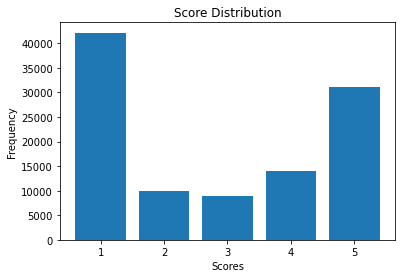

In [4]:
values,freq = np.unique(review['score'],return_counts=True)
plt.bar(values,freq)
plt.title("Score Distribution")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

In [5]:
print('Max Time: {}'.format(max(review['at'])))
print('Min Time: {}'.format(min(review['at'])))

Max Time: 2022-04-04 23:25:28
Min Time: 2015-11-29 23:15:25


In [6]:
review[["date",'time']] = review["at"].str.split(" ", expand = True)
review[['year','month','day']]=review['date'].str.split("-",expand=True)
review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,time,year,month,day
0,gp:AOqpTOHzFnRT8OteZT0bORvHDjfo2rRVbMlDxC9Ncmn...,Andrew Bogwald,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's funny, I didn't really get any matches un...",1,0,5.263.1,2022-04-04 23:25:28,"Hi Andrew, our team would love the opportunity...",2021-07-26 08:55:24,2022-04-04,23:25:28,2022,04,04
1,gp:AOqpTOGUCzQdBXuib31Wuh_eA9_HVrvkDl_kp8GkDkD...,kapil shrimali,https://play-lh.googleusercontent.com/a-/AOh14...,It is a fun experience!,4,0,5.263.1,2022-04-04 23:23:42,NaN,NaN,2022-04-04,23:23:42,2022,04,04
2,gp:AOqpTOHevqi_O90Ak_K0bsc-Mcc6PVY7KvK_98QGpBR...,Hossein Abedi K.,https://play-lh.googleusercontent.com/a-/AOh14...,Even paying isn't good enough They'll hide peo...,1,0,5.260.0,2022-04-04 23:03:11,NaN,NaN,2022-04-04,23:03:11,2022,04,04
3,gp:AOqpTOHpCnbTBEzNz8oGlGCLAXPhb3GGr_8AeQaHE7u...,Kai Johnson,https://play-lh.googleusercontent.com/a/AATXAJ...,Try another app this is lame,1,2,5.264.0,2022-04-04 23:03:04,Thank you for your review.\nWe have acknowledg...,2022-04-02 19:38:14,2022-04-04,23:03:04,2022,04,04
4,gp:AOqpTOEDinXvWmcD6KDEwYv2qsEY_MGZoP2v_5QwFq2...,Trophy Hunter,https://play-lh.googleusercontent.com/a-/AOh14...,-it gave me cold pizza-,5,0,5.263.1,2022-04-04 23:00:19,NaN,NaN,2022-04-04,23:00:19,2022,04,04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105949,gp:AOqpTOFUSsO0USHwsOJcDVmiSBUHwwYYpc4U2XdOkDH...,Sarah Mick,https://play-lh.googleusercontent.com/a-/AOh14...,Finally here!,5,54,1.0.1,2015-12-01 02:17:24,NaN,NaN,2015-12-01,02:17:24,2015,12,01
105950,gp:AOqpTOFqzRcDRdmE-XDBaq8lZT_Hs3bZ5SKxw7yiPBQ...,Mike Mikesell,https://play-lh.googleusercontent.com/a/AATXAJ...,Finally!,5,76,1.0.1,2015-12-01 02:09:05,NaN,NaN,2015-12-01,02:09:05,2015,12,01
105951,gp:AOqpTOEjLo1SOe9tXtwo4oDEmWnwwYDjxbr_QNa8cBo...,Phil T,https://play-lh.googleusercontent.com/a/AATXAJ...,"Finally, an app where women have to start the ...",4,2,1.0.1,2015-12-01 00:18:53,NaN,NaN,2015-12-01,00:18:53,2015,12,01
105952,gp:AOqpTOHBUyrp_Iga7bBPSgq8do2pGbk5Fp7qRTtVy48...,Alexander Khozya,https://play-lh.googleusercontent.com/a-/AOh14...,At last we have Android version!,5,60,1.0.0,2015-11-30 21:27:51,NaN,NaN,2015-11-30,21:27:51,2015,11,30


<BarContainer object of 8 artists>

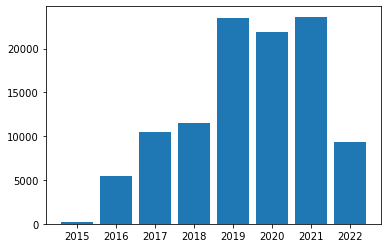

In [7]:
review['year'] = review['year'].astype(str).astype(int)
years,freq = np.unique(review['year'],return_counts=True)
plt.bar(years,freq)

[[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1]]


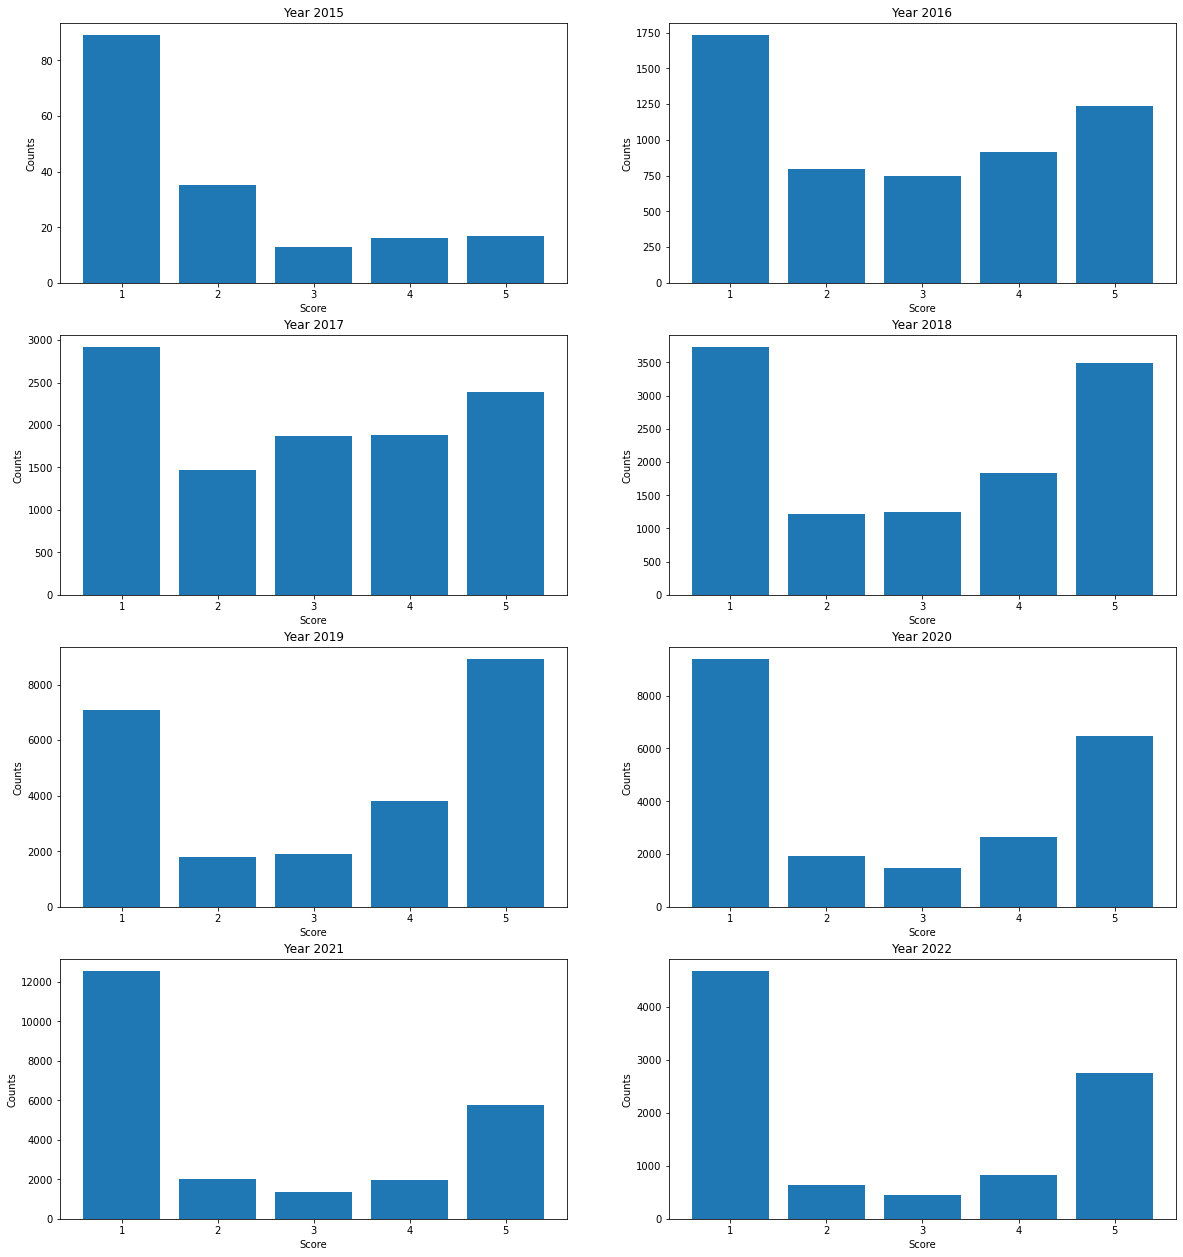

In [8]:
fig, ax = plt.subplots(4,2,figsize=(20,22))
axis = []
for i in range(4):
    for j in range(2):
        axis.append([i,j])
print(axis)
a = 0
for i in years:
    year_review = review[review['year'] == i]
    score,freq = np.unique(year_review['score'],return_counts=True)
    x,y = axis[a]
    ax[x,y].bar(score,freq)
    ax[x,y].set_title(f"Year {i}")
    ax[x,y].set_xlabel("Score")
    ax[x,y].set_ylabel("Counts")
    a += 1

In [9]:
score_freq = []
for i in years:
    year_review = review[review['year'] == i]
    score,freq = np.unique(year_review['score'],return_counts=True)
    #print(f"Year - {i}")
    sf = []
    for s,j in enumerate(freq):
        #print(f"Score {s+1}\nFreq  {j}")
        sf.append(j)
    #print("\n")
    score_freq.append(sf)
score_freq = pd.DataFrame(score_freq)
score_freq['Total'] = score_freq.sum(axis=1)
score_freq['Years'] = years
score_freq.columns = [1,2,3,4,5,'Total','Years']
score_freq

,1,2,3,4,5,Total,Years
0,89,35,13,16,17,170,2015
1,1731,793,744,915,1237,5420,2016
2,2916,1470,1865,1878,2384,10513,2017
3,3729,1210,1246,1841,3491,11517,2018
4,7076,1779,1885,3817,8912,23469,2019
5,9382,1928,1457,2656,6463,21886,2020
6,12541,2027,1335,1957,5776,23636,2021
7,4680,642,443,831,2747,9343,2022


In [10]:
score_percent = []
x,y = np.shape(score_freq)
for i in range(x):
    sp = []
    for j in range(y-2):
        x = round((score_freq.iloc[i,j]/sum(score_freq.loc[i,:5]))*100)
        sp.append(x)
    score_percent.append(sp)
score_percent = pd.DataFrame(score_percent)
score_percent['Years'] = years
score_percent.columns = [1,2,3,4,5,'Years']
score_percent

,1,2,3,4,5,Years
0,52,21,8,9,10,2015
1,32,15,14,17,23,2016
2,28,14,18,18,23,2017
3,32,11,11,16,30,2018
4,30,8,8,16,38,2019
5,43,9,7,12,30,2020
6,53,9,6,8,24,2021
7,50,7,5,9,29,2022


In [11]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [12]:
def clean_text(text):
    text = re.sub('[^a-zA-Z]',' ',text)
    text = str(text).lower()
    text = word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemma.lemmatize(word=w,pos='v') for w in text]
    text = [i for i in text if len(i)>2]
    text = ' '.join(text)
    return text

In [13]:
review['content'] = review['content'].astype('str')

In [14]:
review['clean_text'] = review['content'].apply(clean_text)

In [16]:
review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,time,year,month,day,clean_text
0,gp:AOqpTOHzFnRT8OteZT0bORvHDjfo2rRVbMlDxC9Ncmn...,Andrew Bogwald,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's funny, I didn't really get any matches un...",1,0,5.263.1,2022-04-04 23:25:28,"Hi Andrew, our team would love the opportunity...",2021-07-26 08:55:24,2022-04-04,23:25:28,2022,04,04,funny really get match pay week sudden get blow
1,gp:AOqpTOGUCzQdBXuib31Wuh_eA9_HVrvkDl_kp8GkDkD...,kapil shrimali,https://play-lh.googleusercontent.com/a-/AOh14...,It is a fun experience!,4,0,5.263.1,2022-04-04 23:23:42,NaN,NaN,2022-04-04,23:23:42,2022,04,04,fun experience
2,gp:AOqpTOHevqi_O90Ak_K0bsc-Mcc6PVY7KvK_98QGpBR...,Hossein Abedi K.,https://play-lh.googleusercontent.com/a-/AOh14...,Even paying isn't good enough They'll hide peo...,1,0,5.260.0,2022-04-04 23:03:11,NaN,NaN,2022-04-04,23:03:11,2022,04,04,even pay good enough hide people near even use...
3,gp:AOqpTOHpCnbTBEzNz8oGlGCLAXPhb3GGr_8AeQaHE7u...,Kai Johnson,https://play-lh.googleusercontent.com/a/AATXAJ...,Try another app this is lame,1,2,5.264.0,2022-04-04 23:03:04,Thank you for your review.\nWe have acknowledg...,2022-04-02 19:38:14,2022-04-04,23:03:04,2022,04,04,try another app lame
4,gp:AOqpTOEDinXvWmcD6KDEwYv2qsEY_MGZoP2v_5QwFq2...,Trophy Hunter,https://play-lh.googleusercontent.com/a-/AOh14...,-it gave me cold pizza-,5,0,5.263.1,2022-04-04 23:00:19,NaN,NaN,2022-04-04,23:00:19,2022,04,04,give cold pizza
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105949,gp:AOqpTOFUSsO0USHwsOJcDVmiSBUHwwYYpc4U2XdOkDH...,Sarah Mick,https://play-lh.googleusercontent.com/a-/AOh14...,Finally here!,5,54,1.0.1,2015-12-01 02:17:24,NaN,NaN,2015-12-01,02:17:24,2015,12,01,finally
105950,gp:AOqpTOFqzRcDRdmE-XDBaq8lZT_Hs3bZ5SKxw7yiPBQ...,Mike Mikesell,https://play-lh.googleusercontent.com/a/AATXAJ...,Finally!,5,76,1.0.1,2015-12-01 02:09:05,NaN,NaN,2015-12-01,02:09:05,2015,12,01,finally
105951,gp:AOqpTOEjLo1SOe9tXtwo4oDEmWnwwYDjxbr_QNa8cBo...,Phil T,https://play-lh.googleusercontent.com/a/AATXAJ...,"Finally, an app where women have to start the ...",4,2,1.0.1,2015-12-01 00:18:53,NaN,NaN,2015-12-01,00:18:53,2015,12,01,finally app women start conversation love conc...
105952,gp:AOqpTOHBUyrp_Iga7bBPSgq8do2pGbk5Fp7qRTtVy48...,Alexander Khozya,https://play-lh.googleusercontent.com/a-/AOh14...,At last we have Android version!,5,60,1.0.0,2015-11-30 21:27:51,NaN,NaN,2015-11-30,21:27:51,2015,11,30,last android version


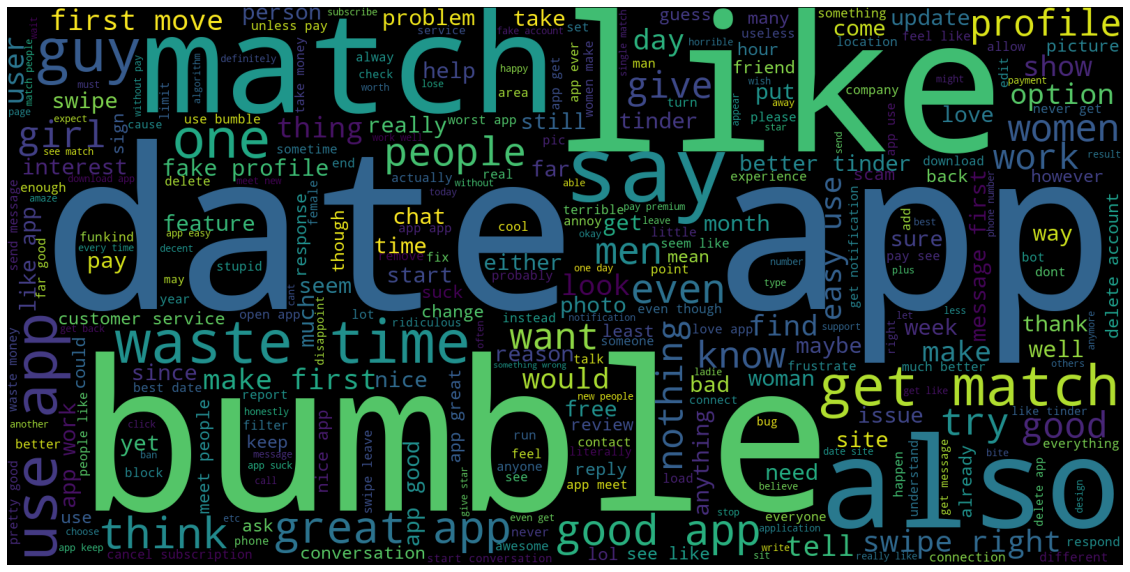

In [15]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(min_font_size=5, max_words=300, width=1600 , height=800 , stopwords=stop_words).generate(str(" ".join(review.clean_text)))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [17]:
analyzer = SentimentIntensityAnalyzer()

In [18]:
def format_output(output_dict):

    polarity = "neutral"
    # I think we should use better
    if(output_dict['compound']>= 0.05):
        polarity = "positive"

    elif(output_dict['compound']<= -0.05):
        polarity = "negative"

    return polarity

def predict_sentiment(text):
  
    output_dict =  analyzer.polarity_scores(text)
    #print(output_dict)
    return format_output(output_dict)

# Run the predictions
review["vader_prediction"] = review["clean_text"].apply(predict_sentiment)

review

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,date,time,year,month,day,clean_text,vader_prediction
0,gp:AOqpTOHzFnRT8OteZT0bORvHDjfo2rRVbMlDxC9Ncmn...,Andrew Bogwald,https://play-lh.googleusercontent.com/a/AATXAJ...,"It's funny, I didn't really get any matches un...",1,0,5.263.1,2022-04-04 23:25:28,"Hi Andrew, our team would love the opportunity...",2021-07-26 08:55:24,2022-04-04,23:25:28,2022,04,04,funny really get match pay week sudden get blow,positive
1,gp:AOqpTOGUCzQdBXuib31Wuh_eA9_HVrvkDl_kp8GkDkD...,kapil shrimali,https://play-lh.googleusercontent.com/a-/AOh14...,It is a fun experience!,4,0,5.263.1,2022-04-04 23:23:42,NaN,NaN,2022-04-04,23:23:42,2022,04,04,fun experience,positive
2,gp:AOqpTOHevqi_O90Ak_K0bsc-Mcc6PVY7KvK_98QGpBR...,Hossein Abedi K.,https://play-lh.googleusercontent.com/a-/AOh14...,Even paying isn't good enough They'll hide peo...,1,0,5.260.0,2022-04-04 23:03:11,NaN,NaN,2022-04-04,23:03:11,2022,04,04,even pay good enough hide people near even use...,positive
3,gp:AOqpTOHpCnbTBEzNz8oGlGCLAXPhb3GGr_8AeQaHE7u...,Kai Johnson,https://play-lh.googleusercontent.com/a/AATXAJ...,Try another app this is lame,1,2,5.264.0,2022-04-04 23:03:04,Thank you for your review.\nWe have acknowledg...,2022-04-02 19:38:14,2022-04-04,23:03:04,2022,04,04,try another app lame,negative
4,gp:AOqpTOEDinXvWmcD6KDEwYv2qsEY_MGZoP2v_5QwFq2...,Trophy Hunter,https://play-lh.googleusercontent.com/a-/AOh14...,-it gave me cold pizza-,5,0,5.263.1,2022-04-04 23:00:19,NaN,NaN,2022-04-04,23:00:19,2022,04,04,give cold pizza,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105949,gp:AOqpTOFUSsO0USHwsOJcDVmiSBUHwwYYpc4U2XdOkDH...,Sarah Mick,https://play-lh.googleusercontent.com/a-/AOh14...,Finally here!,5,54,1.0.1,2015-12-01 02:17:24,NaN,NaN,2015-12-01,02:17:24,2015,12,01,finally,neutral
105950,gp:AOqpTOFqzRcDRdmE-XDBaq8lZT_Hs3bZ5SKxw7yiPBQ...,Mike Mikesell,https://play-lh.googleusercontent.com/a/AATXAJ...,Finally!,5,76,1.0.1,2015-12-01 02:09:05,NaN,NaN,2015-12-01,02:09:05,2015,12,01,finally,neutral
105951,gp:AOqpTOEjLo1SOe9tXtwo4oDEmWnwwYDjxbr_QNa8cBo...,Phil T,https://play-lh.googleusercontent.com/a/AATXAJ...,"Finally, an app where women have to start the ...",4,2,1.0.1,2015-12-01 00:18:53,NaN,NaN,2015-12-01,00:18:53,2015,12,01,finally app women start conversation love conc...,positive
105952,gp:AOqpTOHBUyrp_Iga7bBPSgq8do2pGbk5Fp7qRTtVy48...,Alexander Khozya,https://play-lh.googleusercontent.com/a-/AOh14...,At last we have Android version!,5,60,1.0.0,2015-11-30 21:27:51,NaN,NaN,2015-11-30,21:27:51,2015,11,30,last android version,neutral


In [19]:
polar,freq = np.unique(review["vader_prediction"],return_counts=True)
positive = (freq[2]/(sum(freq))*100).round(2)
neutral = (freq[1]/(sum(freq))*100).round(2)
negative = (freq[0]/(sum(freq))*100).round(2)
print(f"Positive : {positive}\nNegative : {negative}\nNeutral  : {neutral}")

Positive : 56.68
Negative : 25.48
Neutral  : 17.84


In [20]:
score,freq = np.unique(review["score"],return_counts=True)
score,freq
positive_score = ((freq[4]+freq[3])/(sum(freq))*100).round(2)
negative_score = ((freq[0]+freq[1])/(sum(freq))*100).round(2)
neutral_score = ((freq[2])/(sum(freq))*100).round(2)
print(f"Positive Score: {positive_score}\nNegative Score: {negative_score}\nNeutral Score: {neutral_score}")

Positive Score: 42.41
Negative Score: 49.1
Neutral Score: 8.48
